# Homework 4 - Time Complexity

This homework explores time complexity in more detail. In particular, we'll look at two approaches for searching for a value. Comparing these two algorithms will give us insights into complexity and how we can use it to compare algorithms

We'll compare Linear Search to Binary Search. Linear Search is what's called a "brute force" algorithm. We simply look at every value until we find the one we're looking for. For example, let's say we have the numbers 1 through 10. I pick a number and ask you to guess which number I picked. Searching for my number by linear search, you'd guess 1, if that wasn't correct you'd then guess 2, and so on until you guessed the number I picked. Binary search, on the other hand, divides the search space into two equal parts - this is where the "binary" in the name comes from. It then eliminates one of those parts based on on information about the value we're looking for. For example, you might ask "Is you number greater than or equal to 5?". My answer would allow you to eliminate half of possible numbers. Binary search repeats this process until it finds the correct answer - each time eliminating half of the values. 

1.) Define a function called linearSearch that takes two inputs and implements linear search. The two inputs are the value you're searching for and a list containing the data values. For example, your function should look like

```python
def linearSearch(searchValue, data):
    # implement linear search here
```

the implementation of linear search should loop over all values in <i>data</i> until it finds <i>searchValue</i>. The function should return the index (position) of where we can find <i>searchValue</i> in <i>data</i>. If <i>searchValue</i> is not found then your function should return -1.

In [72]:
def linearSearch(searchValue, data):
    index = 0
    for datum in data:
        if datum == searchValue:
            break
        index += 1
    return index

2.) Now we're going to define a function that implements binary search. Your function should be called binarySearch and have the same inputs as linearSearch. For example:

```python
def binarySearch(searchValue, data):
    # implement binary search here
```

The steps to implement binary search are
1. Define lowIndex, which is 0 to start
2. Define highIndex, which is the index of the last point in your list <i>data</i>
3. Determine the index of the midpoint of your list. It's recommended you use Python's integer division // as you won't always have an even number of elements in your list
4. Get the value that's at the midpoint index
5. Is it the value we're looking for
If yes, then we're done. Return the index of the midpoint
If no, compare the searchValue to the value at the midpoint
  Is the searchValue less than our midpoint value?
     If yes, set the highIndex to be the midpoint - 1
     If no, set the lowIndex to be the midpoint + 1
6. Repeat step 5 until we find the value we're looking for

In [73]:
def binarySearch(searchValue, data):
    indexOfSearchValue = -1
    lowIndex = 0
    highIndex = len(data)-1
    while lowIndex <= highIndex:
        mid = (lowIndex+highIndex)//2
        value = data[mid]
        if value == searchValue:
            indexOfSearchValue = mid
            break
        elif searchValue < value:
            highIndex = mid - 1
        else:
            lowIndex = mid + 1
    return indexOfSearchValue

Let's try our two approaches to search on lists of different sizes.

3.) Create a list with one thousand values using the range() function. Use numpy's random integer capability to choose a random value from the list. Apply both linear search and binary search to your list searching for this random value. Import time() from Python's time libary and use it to track how long linear search takes to execute. Then use the same time() function to track how long binary search takes to execute. Print out the execution times.

In [84]:
import time
import numpy as np
data = range(1000)
searchValue = np.random.randint(0,1000)
start1 = time.time()
linearIndex = linearSearch( searchValue, data )
stop1 = time.time()
start2 = time.time()
binaryIndex = binarySearch( searchValue, data )
stop2 = time.time()
print( "Linear search took", stop1-start1, "seconds" )
print( "Binary search took", stop2-start2, "seconds" )

Linear search took 0.00014066696166992188 seconds
Binary search took 0.00016570091247558594 seconds


4.) Repeat question 3, but this time use a 10,000 element list

In [85]:
data = range(10000)
searchValue = np.random.randint(0,10000)
start1 = time.time()
linearIndex = linearSearch( searchValue, data )
stop1 = time.time()
start2 = time.time()
binaryIndex = binarySearch( searchValue, data )
stop2 = time.time()
print( "Linear search took", stop1-start1, "seconds" )
print( "Binary search took", stop2-start2, "seconds" )

Linear search took 0.0015697479248046875 seconds
Binary search took 6.222724914550781e-05 seconds


5.) Repeate question 3, but this time use a 1 million element list

In [86]:
data = range(100000)
searchValue = np.random.randint(0,100000)
start1 = time.time()
linearIndex = linearSearch( searchValue, data )
stop1 = time.time()
start2 = time.time()
binaryIndex = binarySearch( searchValue, data )
stop2 = time.time()
print( "Linear search took", stop1-start1, "seconds" )
print( "Binary search took", stop2-start2, "seconds" )

Linear search took 0.015847206115722656 seconds
Binary search took 0.00025391578674316406 seconds


6.) Repeat question 3 one more time, but this time use a 10 million element list.

In [87]:
data = range(1000000)
searchValue = np.random.randint(0,1000000)
start1 = time.time()
linearIndex = linearSearch( searchValue, data )
stop1 = time.time()
start2 = time.time()
binaryIndex = binarySearch( searchValue, data )
stop2 = time.time()
print( "Linear search took", stop1-start1, "seconds" )
print( "Binary search took", stop2-start2, "seconds" )

Linear search took 0.041953325271606445 seconds
Binary search took 5.459785461425781e-05 seconds


As you've seen, for smaller lists (1,000 elements or smaller) binary and linear search execute in about the same amount of time. However, as the size of the lists increase, binary search finds the search value much faster. 

We can see that binary search is performing better, but execution time isn't a good way to describe how much better. The reason is that execution time is very dependant on the computer hardware we are currently running on. Saying, "binary search found the search value in 0.5 seconds" doesn't really tell us much. It tells us how fast the algorithm ran on your computer, but doesn't say much about how fast it'll run on my computer - or on a supercomputer. A more general approach is to describe the trend - how does execution time increase as the input data increases in size? Let's do that.

Think of time complexity as "worst case scenario". For linear search, the worst case is that our search value is the last one in the list and we have to search through every element of the list. Thus, if there are n elements in the list then we need to execute n Python statements.

For binary search, we discard half of the values each time. The worst case number of Python statements that need to execute <i>i</i> is related to the size of the list <i>n</i> by

n = 2<sup>i</sup>

solving for i gives us:

i = log<sub>2</sub>n

7.) Let's visualize what this time complexity looks like as n increases. On the x-axis we'll have n (the size of the list) and on the y-axis we'll have execution time. Keep in mind that we're not concerned with actual values. We just want to know the trend. 

For linear search the worst case is that our search value is the last one in the list and we have to search through every element of the list. Thus, if there are n elements in the list then we need to execute n Python statements. Visualize this.

For binary search we derived that the worst case number of Python statements <i>i</i> that need to execute is related to the size of the list <i>n</i> by

i = log<sub>2</sub>n

Visualize this on the same plot. Include a legend, a title, and x and y axis labels

Text(0,0.5,'Execution Time')

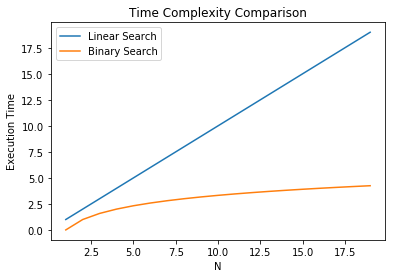

In [103]:
import math
x = np.arange(1,20,1)
y1 = x
y2 = []
for i in x:
    y2.append(math.log(i,2))
plt.plot(x, y1)
plt.plot(x, y2)
plt.title('Time Complexity Comparison')
plt.legend(['Linear Search', 'Binary Search'])
plt.xlabel('N')
plt.ylabel('Execution Time')

8.) Our visualization is showing us that binary search is a "better" way to search because it has less time complexity. As n increases the Binary Search line is always well below the Linear search line in our plot. However, we don't always use binary search when implementing search. For example, many of the Python library functions that use search are build using linear search. Why? If binary search is so much better, why do you think it isn't always used? Look back over our implementations of linear and binary search. Binary search has a pre-condition that must be met in order for this algorithm to be used. What is it? If you need a hint in answering this question, try the next question and then come back to this one.

9.) We've seen that for binary search worst case the number of Python statements <i>i</i> that need to execute is related to the size of the list <i>n</i> by

i = log<sub>2</sub>n

There are 12 million people living in New York city. You are in New York city and have a phone book listing all the New York city residents in alphabetical order along with their phone numbers. If you stopped a person randomly on the street, at most, how many guesses would it take to find their phone number asking them questions about their last name?

In [104]:
print( math.log(12000000,2) )

23.516531070045332
